<a href="https://colab.research.google.com/github/OjasSharma29/Object-Detection/blob/main/VGG_16_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checking for the gpu

In [25]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Importing libraries

In [26]:
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from tensorflow.keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

# Importing the dataset

CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Kaggle is hosting a CIFAR-10 leaderboard for the machine learning community to use for fun and practice. You can see how your approach compares to the latest research methods on Rodrigo Benenson's classification results page.

In [27]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualisation of the dataset

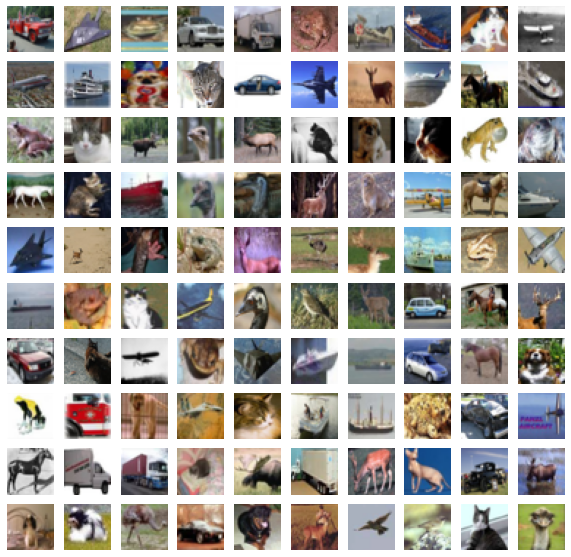

In [28]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

ROWS = 10

x = x_train.astype("uint8")

fig, axes1 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
    for k in range(ROWS):
        i = np.random.choice(range(len(x)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x[i:i+1][0])

In [29]:
x_train.shape

(50000, 32, 32, 3)

In [30]:
y_train.shape

(50000, 10)

# Defining the model

In [31]:
model = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_30 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 activation_31 (Activation)  (None, 32, 32, 64)        0         
                                                      

# Scheduling the learning rate wrt epochs

In [33]:
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

sgd = optimizers.SGD(learning_rate=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [34]:
def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
    
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

# Using ImageDataGenerator for randomising/modifying the data wrt image 

In [35]:
datagen = ImageDataGenerator(
    
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).

# Training the model

In [36]:
batch_size = 128
maxepoches = 120


history = model.fit(datagen.flow(x_train, y_train,
                                               batch_size=batch_size),
                                  
                                steps_per_epoch=x_train.shape[0] // batch_size,
                                epochs=maxepoches,
                                validation_data=(x_test, y_test),callbacks=[reduce_lr], verbose=1)

Epoch 1/120
390/390 [==============================] - 66s 161ms/step - loss: 19.0744 - accuracy: 0.2024 - val_loss: 13.8796 - val_accuracy: 0.1337 - lr: 0.1000
Epoch 2/120
390/390 [==============================] - 62s 159ms/step - loss: 9.8653 - accuracy: 0.3072 - val_loss: 7.4251 - val_accuracy: 0.1991 - lr: 0.1000
Epoch 3/120
390/390 [==============================] - 62s 159ms/step - loss: 5.3463 - accuracy: 0.4132 - val_loss: 4.2814 - val_accuracy: 0.3855 - lr: 0.1000
Epoch 4/120
390/390 [==============================] - 62s 159ms/step - loss: 3.2565 - accuracy: 0.5180 - val_loss: 2.6511 - val_accuracy: 0.5416 - lr: 0.1000
Epoch 5/120
390/390 [==============================] - 62s 159ms/step - loss: 2.3041 - accuracy: 0.5733 - val_loss: 2.4269 - val_accuracy: 0.4970 - lr: 0.1000
Epoch 6/120
390/390 [==============================] - 62s 159ms/step - loss: 1.9112 - accuracy: 0.6065 - val_loss: 3.1742 - val_accuracy: 0.2910 - lr: 0.1000
Epoch 7/120
390/390 [=======================

# Testing

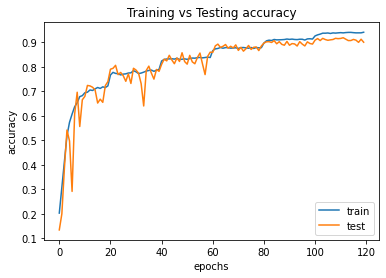

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='lower right')
plt.show()

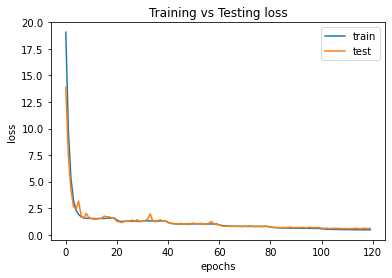

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [40]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 7s 23ms/step - loss: 0.6094 - accuracy: 0.9001
Test loss: 0.609443187713623
Test accuracy: 0.9000999927520752


In [41]:
tr_scores = model.evaluate(x_train, y_train, verbose=1)
print('loss:', tr_scores[0])
print('accuracy:', tr_scores[1])

1563/1563 [==============================] - 35s 23ms/step - loss: 0.3840 - accuracy: 0.9644
loss: 0.3840438425540924
accuracy: 0.9643800258636475
